In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#default_exp utils.data.dataset

# Dataset

A child of torch dataset.

CovidX dataset.

Load and split

In [ ]:
#export

from PrimeCNNv3.imports import *
from PrimeCNNv3.utils.vizualize import *

In [ ]:
#hide



SEED = 0

np.random.seed(SEED)
random.seed(SEED)

train_filepath = Path('../../CovidX/data/train_COVIDx5.txt')

with open(train_filepath,'r') as file:
    cxr_list = np.array([line.rstrip('\n') for line in file])



In [ ]:
#export
def get_dataset(filepath, seed=None):
    '''
        Args:
            
            filepath:
                path to the train/test file
                
        return:
            list containing the image name and label
    '''
    with open(filepath,'r') as file:
        cxr_list = np.array([line.rstrip('\n') for line in file])
    cxr_list.sort()
    
    if seed is not None:
        np.random.seed(seed)
        
    np.random.shuffle(cxr_list)
    
    return np.array(cxr_list)

In [ ]:
train_data = get_dataset(train_filepath, seed=42)

In [ ]:
#export
def get_train_val_split(train_list, valid_pct = 0.2, seed = None):
    '''
        Args:
        
            train_list:
                list containing the image and labels string
            
            valid_pct:
                default = 0.2
                valiation split ratio
                
            seed:
                default is None
                seed value for reproducibility
    '''
    content_list = train_list
    
    if seed is not None:
        np.random.seed(seed)
    
    idx = list(range(len(content_list)))
    np.random.shuffle(idx)
    
    valid_split = int(valid_pct * len(content_list))
    
    valid_idx = idx[valid_split:]
    train_idx = idx[:valid_split]
    
    train_list = content_list[valid_idx]
    valid_list = content_list[train_idx]
    
    return train_list, valid_list

In [ ]:
#hide
train_lst, valid_lst = get_train_val_split(train_data, valid_pct=0.2, seed = 42)

In [ ]:
#hide
#stats

train_count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}
valid_count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}

#for train ds
for element in train_lst:
    pathlogy = element.split()[-2]
    train_count[pathlogy] += 1

#for valid ds
for element in valid_lst:
    pathlogy = element.split()[-2]
    valid_count[pathlogy] += 1

In [ ]:
#hide
print(train_count)
print(valid_count)

{'normal': 6384, 'pneumonia': 4371, 'COVID-19': 412}
{'normal': 1582, 'pneumonia': 1104, 'COVID-19': 105}


In [ ]:
class CovidXDataset(Dataset):
    '''CovidXv5 Dataset'''
    
    def __init__(self, root_dir, data_list, seed = None, transform = None):
        '''
            Args:
            root_dir (Path): Directory with all the images.
            data_list (numpy array): list of images and labels
            seed (int): seed value
            transform (callable):  transform to be applied
                on a sample, required to convert np array to torch tensor
        '''
        self.seed = seed
        self.root_dir = root_dir
        self.transform = transform
        self.data_list = data_list
        self.CLASSES = {'normal' : 0, 'pneumonia' : 1, 'COVID-19' : 2}
        self.MAX_VAL = 255
        
    def __getitem__(self, idx):
        
        #extract label and get int value
        label = self.CLASSES[self.data_list[idx].split()[2]]
        
        #extract imagename and join image with root_dir path 
        image_path = Path.joinpath(self.root_dir, self.data_list[idx].split()[1])
        
        
        image = np.array(Image.open(image_path).convert('RGB'))
        
        transform_seed = np.random.randint(2147483647)
        
        if self.transform:
            random.seed(transform_seed)
            augmented = self.transform(image=np_image)
            image = augmented['image']
           
        return image, label
        
    def __len__(self):
        return len(self.data_list)
        
    def show_images(self, n, figsize= (10,10), nrows = 1, ncols = None, rand = False):
        '''
            Shows n images with their labels
        '''
        if not rand:
            #get same images everytime
            random.seed(self.seed)
            
        indices = random.sample(range(0,self.__len__()), n)
        
        if ncols is None: 
            ncols = int(len(indices)/nrows)
                                      
        _,axs = plt.subplots(nrows, ncols, figsize = figsize)
       
                                      
        for idx, ax in zip(indices, axs.flatten()):
            label = self.data_list[idx].split()[2]
            
            image_path = Path.joinpath(self.root_dir, self.data_list[idx].split()[1])
            
            image = np.array(Image.open(image_path).convert('RGB'))
            
            show_image(image, ax = ax, title = label )
                        
                                      
        plt.tight_layout(True)                       
        
    def show_distribution(self, figsize = (5,5)):
        class_dist = {key : 0 for key in self.CLASSES.keys()}
        for element in self.data_list:
            label = element.split()[2]
            class_dist[label] += 1 
        
        _, ax = plt.subplots(1,1, figsize = figsize)
        
        ax.bar(class_dist.keys(), class_dist.values())

In [ ]:
train_ds = CovidXDataset(Path('../../CovidX/data/train'), train_data, seed = 42)

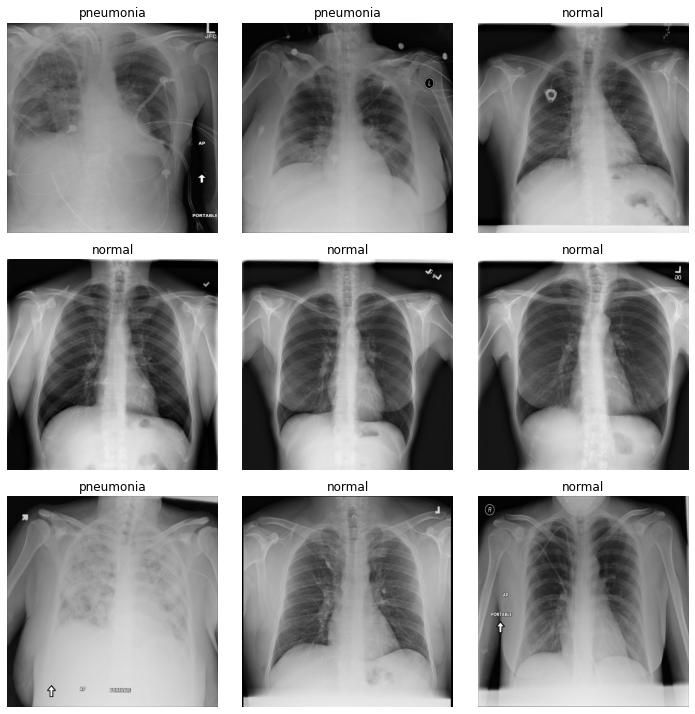

In [ ]:
train_ds.show_images(10, nrows=3, rand=False)

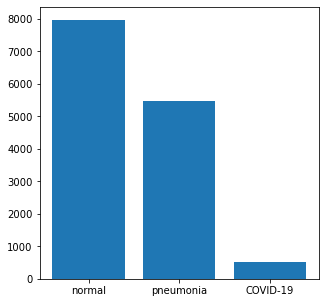

In [ ]:
train_ds.show_distribution()

In [ ]:
from nbdev.export import notebook2script; notebook2script()

Converted 00_utils.data.dataset.ipynb.
Converted 01_utils.data.Dataloaders.ipynb.
Converted 02_utils.vizualize.ipynb.
Converted index.ipynb.
